<a href="https://colab.research.google.com/github/abhinavasr/machinelearning/blob/master/Openjourney.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers torch transformers accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.8/212.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 67.7 MB/s eta 0:00:00


In [ ]:
from diffusers import StableDiffusionImg2ImgPipeline
import torch
model_id = "prompthero/openjourney-v2"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


In [22]:
import requests
from IPython.display import display

# image_url = "https://media.licdn.com/dms/image/C4D03AQGM9xTM5yO9eQ/profile-displayphoto-shrink_800_800/0/1516770943236?e=2147483647&v=beta&t=R2DCo0kcxsQ-FZqoyqL73VJjyYWkDgrG8VIG3CJIj-w"
image_url = 'https://lh3.googleusercontent.com/z-NVpOxDDz2TyN85laQQa04Wn8PaFZQQKzYdkfRnhEdbUHdAMwI5hmd7lGhW7o-Y8A0CuyR5HW1Lkx2V9OX_r2R-Tde2QRyQGCsQ9XXfJZHFKrLMAJOQqHcCRUWyiFX3HdA7rxIsFvmwZBKZmQRfRVTM76jw3vJS_6CrF-qEaM3iiZ3De8DIvCFiP8qfGkMwIgd2T6I7kclViLCn-7u7EIjPO8SolIa4o5WqUM4KaR0umAp40LUHZ6Jw7B-4UWGlanDEToMW82ZYGa9IBkJmmKpuhth580OBPkTAz4PPMxyLDJb0Rh44NE9wkvtE3u5pSqe4C6Y4xydAfhv8RdNh2Pj-1L6fdZmkIwmcVIcadkbQdYoR8VSQwMv5cbHoYwujZDH07BFtx7wAgtN1VPj7etD3NJzd51EVp252I9EwliCCvHQ_9hlfDXt_ybQnckQEJqxQqoZvcYDFFcX5q0SrtgEElyotyoijDUlui70G-_h3qhnIP83QJPmb4Lm8Qq5Oc0Ydn1go1HBEIZPcJcPr9Anqzxn0CyiZuneVDDl92xyD9mwjWdm9hMrQv9UUw8HjnTezJx239zrZZn8B62NQtmm8UdnN0AeiAhLTStaAgdO5mmuH-WMOLdbQ6PhCbOUy_Xz2GG759OSkHa8ZFE0vlIM2HUohF8NnvSkF3AZRvyG2ZFnHO6ZbXyNtRTuwT9gco2lfhgS7_V_Jz6QNLPdI8cmX4g4ls90FN9Xvk6al5-ZLAYGzP6c5TMGYv3UMZXps0qDtlshyP-3PMdJMbJ14OOW3wiG1l-joGsA6mRyivDCEwuMX56e-VYsAkcdmB4ZJj1C0FRy5RkrySa-1BQzG7y4Vd6StxhSxKOuPu7veHwD_DAkJmR78sRBsNQnd1LkK_b3XQhubx5QMX-Qu1FV4yQka8IJZBK5aRYPXPwsjXpozpHmEvFNS31bNbkIJ33pRBhXey3Bce7BdJnMj5RY48CEose6FuWpMdjgMoPwEzx5ZP9IeKdTCWj0=w1516-h1566-no?authuser=1'
img_data = requests.get(image_url).content


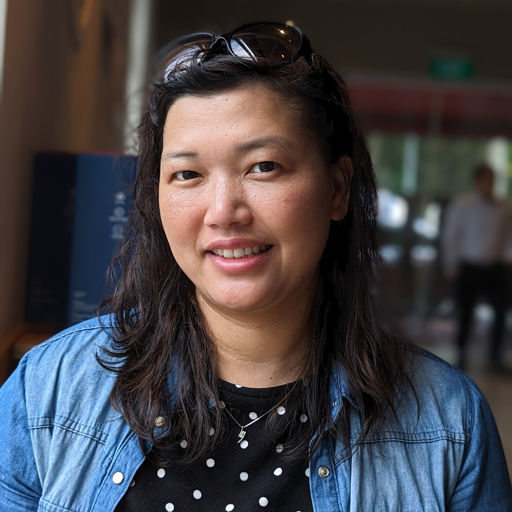

In [23]:
from io import BytesIO
from PIL import Image 
init_image = Image.open(BytesIO(img_data)).convert("RGB")
init_image = init_image.resize((512, 512))
display(init_image)

  0%|          | 0/22 [00:00<?, ?it/s]

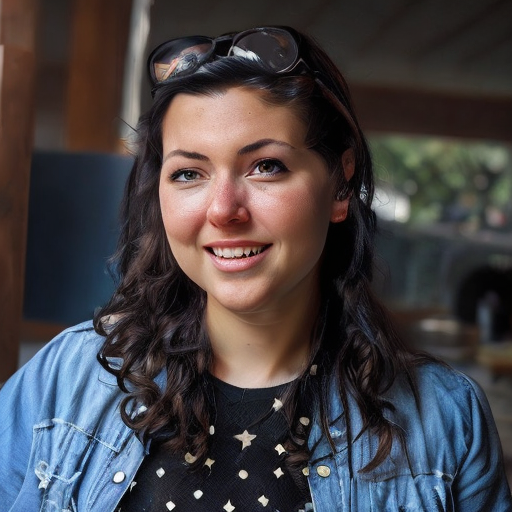

In [40]:
prompt = "greg rutkowski, cartoon style, trending on artstation, beautiful"
negative = "deformed, blotches, blurry, saturated, maximalist, cripple, ugly, additional arms, additional legs, additional head, two heads, multiple people, group of people, blur"

strength = 0.45
num_inference_steps = 50
guidance_scale = 8.5
num_images_per_prompt = 1
image = pipe(prompt, image=init_image, negative_prompt=negative, strength=strength, num_images_per_prompt= num_images_per_prompt, guidance_scale=guidance_scale).images
display(image[0])
# display(image[1])
# display(image[2])
# display(image[3])
# display(image[4])

with torch.no_grad():
    torch.cuda.empty_cache()